# Tips

### Introduction:

This exercise was created based on the tutorial and documentation from [Seaborn](https://stanford.edu/~mwaskom/software/seaborn/index.html)  
The dataset being used is tips from Seaborn.

### Step 1. Import the necessary libraries:

In [2]:
import pandas as pd

# visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns


# print the graphs in the notebook
%matplotlib inline

# set seaborn style to white
sns.set_style("white")


### Step 2. Import the dataset from this [address](https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/07_Visualization/Tips/tips.csv). 

In [3]:
address ='https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/07_Visualization/Tips/tips.csv'

### Step 3. Assign it to a variable called tips

In [4]:
# Como el separador de la base de datos es una coma, no es necesario espeficiarlo pq es el separador por defecto e pd.read_csv
tips = pd.read_csv(address)
tips

,Unnamed: 0,total_bill,tip,sex,smoker,day,time,size
0,0,16.99,1.01,Female,No,Sun,Dinner,2
1,1,10.34,1.66,Male,No,Sun,Dinner,3
2,2,21.01,3.50,Male,No,Sun,Dinner,3
3,3,23.68,3.31,Male,No,Sun,Dinner,2
4,4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...,...
239,239,29.03,5.92,Male,No,Sat,Dinner,3
240,240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,242,17.82,1.75,Male,No,Sat,Dinner,2


### Step 4. Delete the Unnamed 0 column

In [5]:
tips = tips.drop('Unnamed: 0', axis=1)
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


### Step 5. Plot the total_bill column histogram

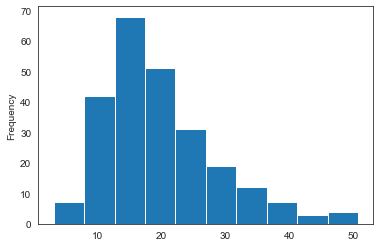

In [8]:
tips['total_bill'].plot(kind='hist')


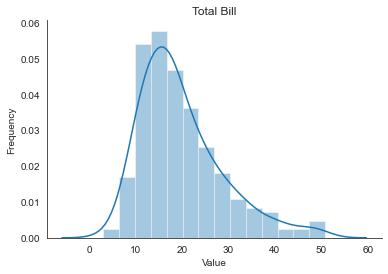

In [22]:
# Si se hace usando seaborn
# create histogram
ttbill = sns.distplot(tips.total_bill);

# set lables and titles
ttbill.set(xlabel = 'Value', ylabel = 'Frequency', title = "Total Bill")

# take out the right and upper borders
sns.despine()

### Step 6. Create a scatter plot presenting the relationship between total_bill and tip

Text(0, 0.5, 'tip')

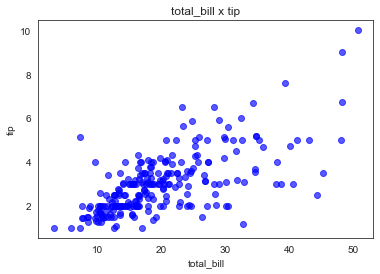

In [12]:
plt.scatter(x=tips.total_bill, y=tips.tip, c='blue', alpha=0.65)
plt.title("total_bill x tip")
plt.xlabel('total_bill')
plt.ylabel('tip')

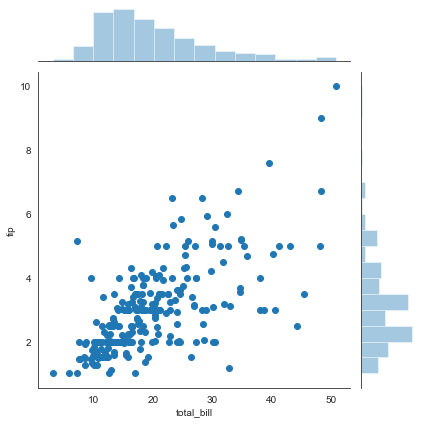

In [23]:
# Usando la libreria seaborn
sns.jointplot(x='total_bill', y='tip', data=tips)

### Step 7.  Create one image with the relationship of total_bill, tip and size.
#### Hint: It is just one function.

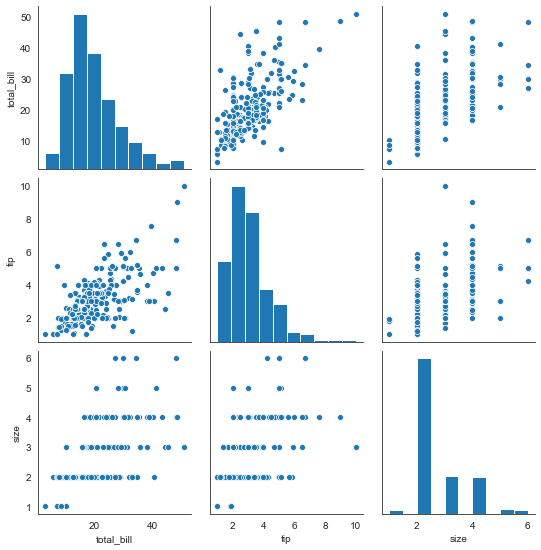

In [24]:
# pairplot creara unas graficas en las que se compararan entre si todas las columnas con valores numericos del dataframe
sns.pairplot(tips)

### Step 8. Present the relationship between days and total_bill value

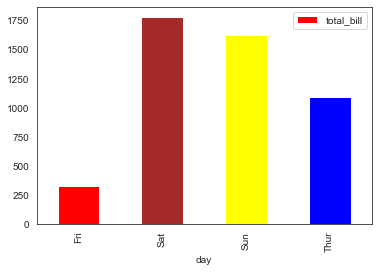

In [43]:
s = pd.pivot_table(tips, values=["total_bill"], index="day", aggfunc="sum")

#s['total_bill'].plot(kind='bar')
s.plot(kind='bar',color =[['red', 'brown', 'yellow','blue', 'pink', 'green', 'purple']])
# Este gráfico no seria la mejor forma de visualizar la relacion entre total_bill y los dias en los que se producen porque en las barras nos da el total, no como es cada una de las bills.

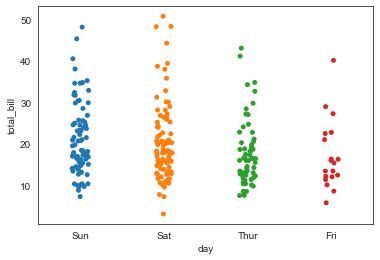

In [37]:
# Utilizando seaborn
sns.stripplot(x = "day", y = "total_bill", data = tips, jitter = True)

### Step 9. Create a scatter plot with the day as the y-axis and tip as the x-axis, differ the dots by sex

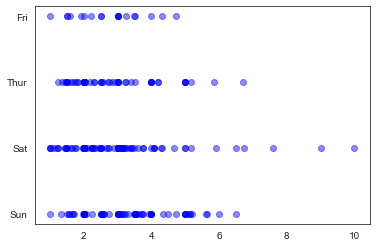

In [36]:
# Con matplotlib pero sin poder diferencias los puntos por sexo
plt.scatter(tips.tip, tips.day, c='blue', alpha=0.45)

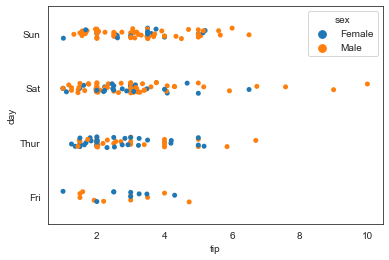

In [40]:
# Usando la libreria seaborn
sns.stripplot(x = "tip", y = "day", hue = "sex", data = tips, jitter = True,)

### Step 10.  Create a box plot presenting the total_bill per day differetiation the time (Dinner or Lunch)

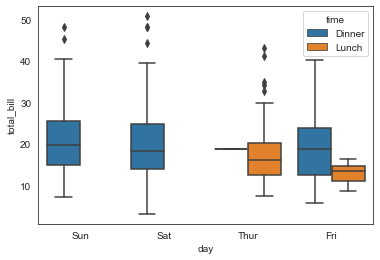

In [44]:
sns.boxplot(x = "day", y = "total_bill", hue = "time", data = tips)

### Step 11. Create two histograms of the tip value based for Dinner and Lunch. They must be side by side.

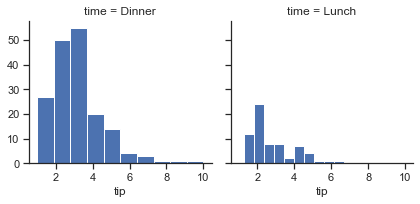

In [45]:
# better seaborn style
sns.set(style = "ticks")

# creates FacetGrid
g = sns.FacetGrid(tips, col = "time")
g.map(plt.hist, "tip")

### Step 12. Create two scatterplots graphs, one for Male and another for Female, presenting the total_bill value and tip relationship, differing by smoker or no smoker
### They must be side by side.

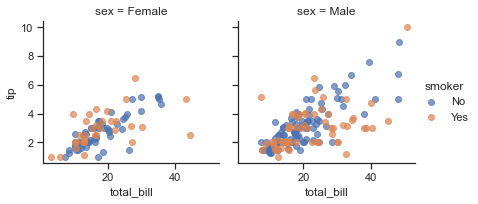

In [46]:
g = sns.FacetGrid(tips, col = "sex", hue = "smoker")
g.map(plt.scatter, "total_bill", "tip", alpha =.7)

g.add_legend()

### BONUS: Create your own question and answer it using a graph.